In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.signal import savgol_filter

In [2]:
folder_out = 'data_out'

(-5.0, 0.0)

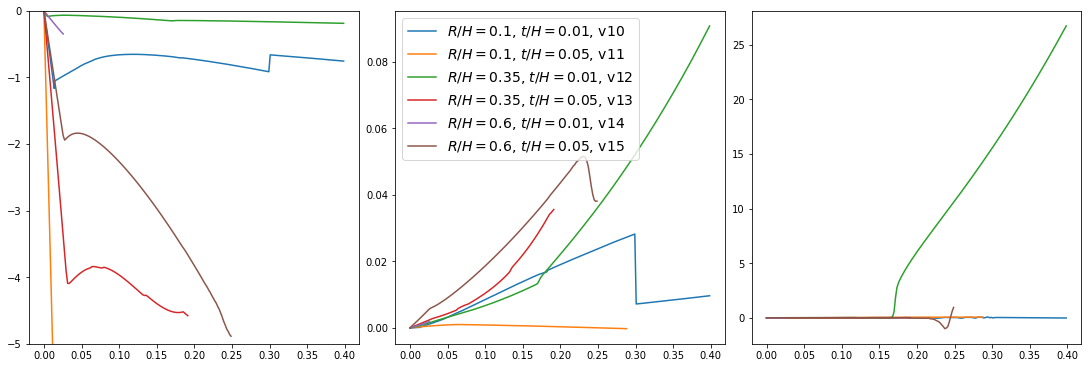

In [17]:
fig, ax = plt.subplots(1,3, figsize = (15,5), constrained_layout = True)
#props:
#[self.H, self.R, self.t1, self.t2, self.theta, self.w, self.E1, self.E2, self.E_cap, self.h_element]
idx_initial = 10
n1 = 3
n2 = 2
v1_sweep = np.linspace(0.1, 0.6, n1)
v2_sweep = np.linspace(0.01, 0.05, n2)

for i, v1 in enumerate(v1_sweep):
    for j, v2 in enumerate(v2_sweep):
        idx_try = idx_initial + i*len(v2_sweep) + j

        proj_name = f'geo_sweep_v{idx_try}'
        cvol, pcav = np.loadtxt(f'{folder_out}/{proj_name}_pcav_cvol.txt', unpack = True)
        time, contraction, twist = np.loadtxt(f'{folder_out}/{proj_name}_contraction_twist.txt', unpack = True)

        vol_norm = -(cvol - cvol[0]) / cvol[0]
        p_kpa = pcav * 1e3
        contraction_strain = 1 - contraction
        twist_deg = twist * 180 / np.pi

        ax[0].plot(vol_norm, p_kpa)
        ax[1].plot(vol_norm, contraction_strain, label = f'$R/H = {v1}$, $t/H = {v2}$, v{idx_try}')
        ax[2].plot(vol_norm, twist_deg)
    
ax[1].legend(loc = 'best', fontsize = 14)
ax[0].set_ylim(top = 0, bottom = -5)
            

139
173
170
-----


(-5.0, 0.0)

/home/heread/.local/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  func(*args, **kwargs)
/home/heread/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


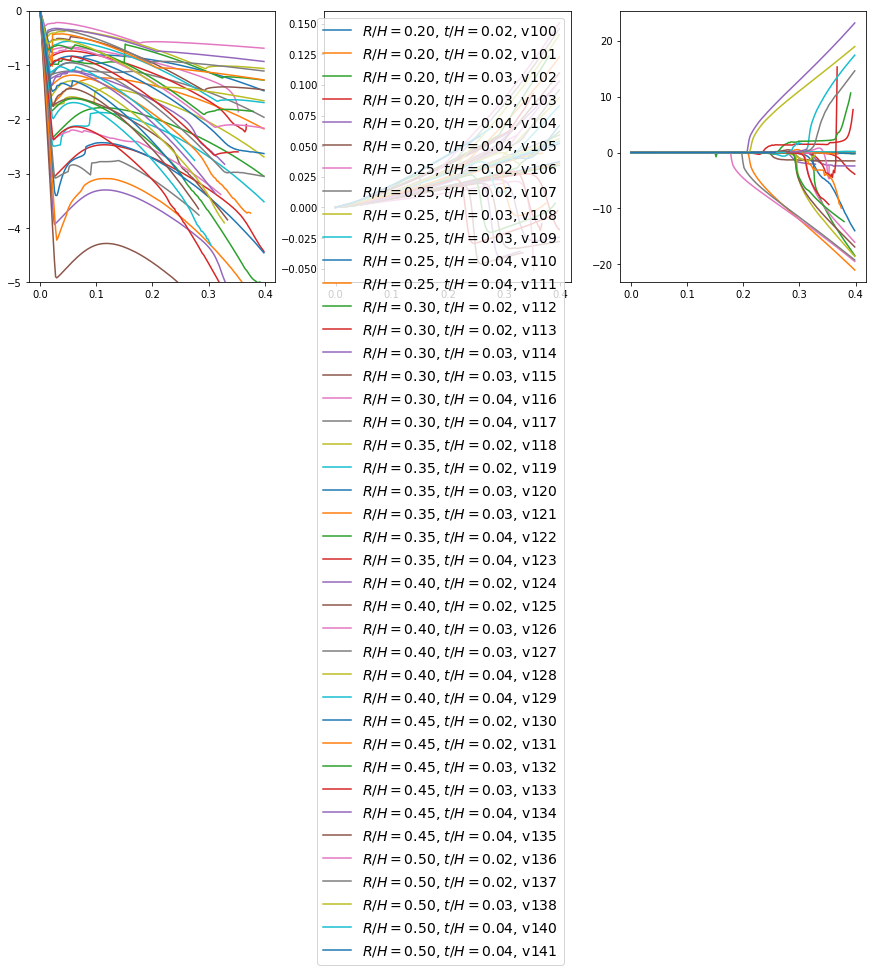

In [8]:
fig, ax = plt.subplots(1,3, figsize = (15,5), constrained_layout = True)
#props:
#[self.H, self.R, self.t1, self.t2, self.theta, self.w, self.E1, self.E2, self.E_cap, self.h_element]
idx_initial = 100
n1 = 7
n2 = 6
v1_sweep = np.linspace(0.2, 0.5, n1)
v2_sweep = np.linspace(0.02, 0.04, n2)

for i, v1 in enumerate(v1_sweep):
    for j, v2 in enumerate(v2_sweep):
        idx_try = idx_initial + i*len(v2_sweep) + j
        # print(idx_try)

        proj_name = f'geo_sweep_v{idx_try}'
        cvol, pcav = np.loadtxt(f'{folder_out}/{proj_name}_pcav_cvol.txt', unpack = True)
        time, contraction, twist = np.loadtxt(f'{folder_out}/{proj_name}_contraction_twist.txt', unpack = True)

        if len(contraction) != len(cvol):
            print(idx_try)
            print(len(contraction))
            print(len(cvol))
            print('-----')
        else:
            vol_norm = -(cvol - cvol[0]) / cvol[0]
            p_kpa = pcav * 1e3
            contraction_strain = 1 - contraction
            twist_deg = twist * 180 / np.pi

            ax[0].plot(vol_norm, p_kpa)
            ax[1].plot(vol_norm, contraction_strain, label = f'$R/H = {v1:.2f}$, $t/H = {v2:.2f}$, v{idx_try}')
            ax[2].plot(vol_norm, twist_deg)
    
ax[1].legend(loc = 'best', fontsize = 14)
ax[0].set_ylim(top = 0, bottom = -5)
            